<a href="https://colab.research.google.com/github/poojayadao12/Capstone_Project_Global-Terrorism-Dataset/blob/main/Summative_Assesment_of_Numerical_Programming_in_Python_Analyze_it_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






In [1]:
import requests
from bs4 import BeautifulSoup
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

job_data = []

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
}

# Modify the base_url for data science jobs
base_url = 'https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%20Science&location=Las%20Vegas%2C%20Nevada%2C%20United%20States&geoId=100293800&currentJobId=3415227738&start={}'

# Scrape job IDs from the initial search results
job_ids = []
for start in range(0, math.ceil(117 / 25)):
    res = requests.get(base_url.format(start), headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    job_cards = soup.find_all("li")
    for job_card in job_cards:
        job_id = job_card.find("div", {"class": "base-card"}).get('data-entity-urn').split(":")[3]
        job_ids.append(job_id)

# Scrape job details
job_detail_url = 'https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/{}'
for job_id in job_ids:
    resp = requests.get(job_detail_url.format(job_id), headers=headers)
    soup = BeautifulSoup(resp.text, 'html.parser')

    job = {}

    try:
        job["company"] = soup.find("div", {"class": "top-card-layout__card"}).find("a").find("img").get('alt')
    except AttributeError:
        job["company"] = None

    try:
        job["job-title"] = soup.find("div", {"class": "top-card-layout__entity-info"}).find("a").text.strip()
    except AttributeError:
        job["job-title"] = None

    try:
        job["level"] = soup.find("ul", {"class": "description__job-criteria-list"}).find("li").text.replace("Seniority level", "").strip()
    except AttributeError:
        job["level"] = None

    job_data.append(job)

# Create a DataFrame and save it to a CSV file
df = pd.DataFrame(job_data)
df.to_csv('datasciencejobs.csv', index=False, encoding='utf-8')

In [2]:
# Load the data from the CSV file
df = pd.read_csv('datasciencejobs.csv')

# Remove rows with missing values
df.dropna(inplace=True)

# Check for and remove duplicate rows
df.drop_duplicates(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [8]:
# Data sample
df.sample(5)

,company,job-title,level
18,Brown & Brown Insurance,Marketing Assistant,Entry level
21,"The Brixton Group, Inc.",Excel Consultant,Mid-Senior level
16,ThinkCERCA,School and District Success Manager-Las Vegas-...,Mid-Senior level
17,T3I Solutions LLC,Operations Research/Systems Analysis (ORSA),Not Applicable
11,"Caesars Entertainment, Inc.",Analyst II - Digital - Corporate (Las Vegas),Entry level


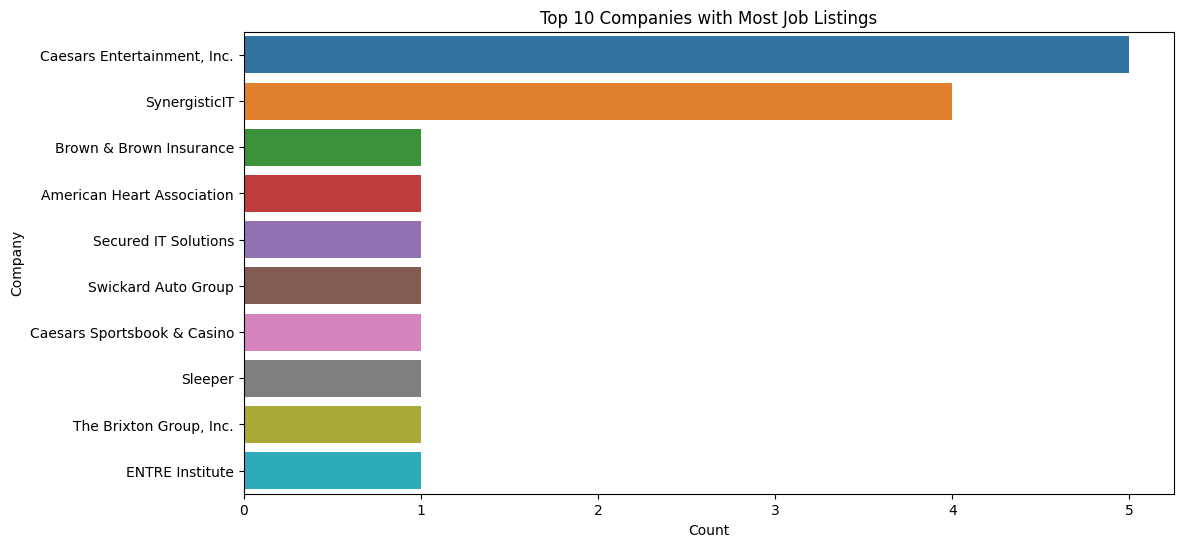

In [5]:
# Plot a bar chart for the top 10 companies with the most job listings
top_10_companies = df['company'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_companies.values, y=top_10_companies.index, orient='h')
plt.title('Top 10 Companies with Most Job Listings')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()


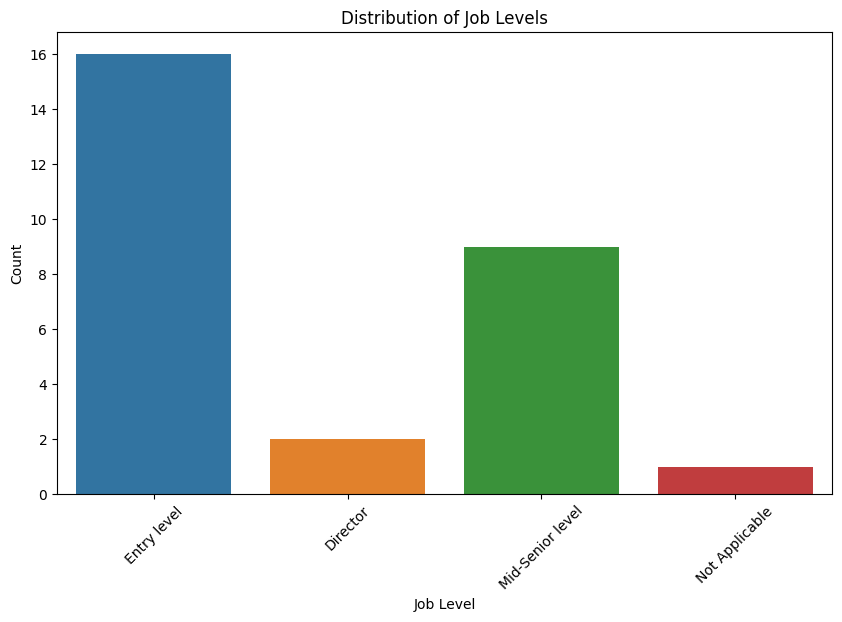

In [4]:
# Plot a bar chart for the distribution of job levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='level')
plt.title('Distribution of Job Levels')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Summary Statistics
print("Summary Statistics:")
print(f"Total rows: {len(df)}")
print(f"Total unique companies: {df['company'].nunique()}")
print(f"Total unique job titles: {df['job-title'].nunique()}")
print(f"Most common company: {df['company'].mode()[0]}")
print(f"Most common job title: {df['job-title'].mode()[0]}")
print(f"Most common level: {df['level'].mode()[0]}")


Summary Statistics:
Total rows: 28
Total unique companies: 21
Total unique job titles: 25
Most common company: Caesars Entertainment, Inc.
Most common job title: Machine Learning Developer
Most common level: Entry level


In [9]:
# Top 10 Job Titles
print("Top 10 Job Titles:")
top_job_titles = df['job-title'].value_counts().head(10)
for rank, (job_title, count) in enumerate(top_job_titles.iteritems(), start=1):
    print(f"{rank}. {job_title}: {count} jobs")

Top 10 Job Titles:
1. Trading Data Analyst: 2 jobs
2. Machine Learning Developer: 2 jobs
3. Rotational Data Scientist I / Data Scientist II: 2 jobs
4. Analyst I (2023 College Graduates) - Las Vegas: 1 jobs
5. Analyst I (May 2024 Graduates) - Las Vegas: 1 jobs
6. Business Analyst (On-Site, 2-Month Contract): 1 jobs
7. Data Analyst, Retail Strategy: 1 jobs
8. Creative Strategist - Growth Marketing: 1 jobs
9. Excel Consultant: 1 jobs
10. Senior Data Analyst (Remote): 1 jobs


<ipython-input-9-72f7c8a18cea>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rank, (job_title, count) in enumerate(top_job_titles.iteritems(), start=1):


Conclusion
Company Landscape: There are a variety of companies offering data science positions in Las Vegas, with Caesars Entertainment, Inc. being the most prominent.

Job Title Diversity: The data science job market in Las Vegas encompasses a wide range of job titles, reflecting the diversity of roles within the field.

Job Level: Entry-level positions are the most common, indicating potential opportunities for recent graduates and individuals looking to start their careers in data science.

Competitive Job Titles: Trading Data Analyst and Machine Learning Developer are competitive job titles, with multiple job listings for each.

Unique Opportunities: Some job titles, such as "Retail Part-Time Store Associate, Fabletics," might not be typical data science roles, suggesting unique opportunities in the Las Vegas job market.

Diverse Skill Sets: The diversity of job titles implies a need for various skill sets, including data analysis, machine learning, and business analysis.